# Deteccion de Outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Importar Datos
Rios = pd.read_csv('./data/Rios.csv')
Rios.head()

,Rio,Millas
0,1,735
1,2,320
2,3,325
3,4,392
4,5,524


**Generamos Histograma**

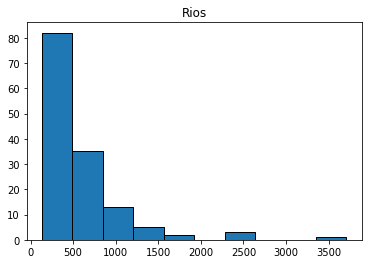

In [ ]:
plt.title('Rios')
plt.hist(Rios['Millas'], edgecolor="black", linewidth=1)
plt.show()

**Identificando los Outliers**

*Se utiliza un grafico de cajas y bigotes para identificar los outliers*

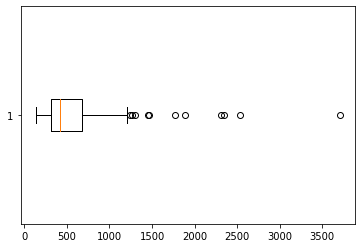

In [ ]:
plt.boxplot(Rios['Millas'], vert=False)
plt.show()

**Calculamos los Quartiles**

In [ ]:
q1 = Rios['Millas'].quantile(0.25)
print("Primer Cuartil", q1)

q3 = Rios['Millas'].quantile(0.75)
print("Tercer Cuartil", q3)

iqr = q3 - q1
print("Rango Interquantile", iqr)

mediana = Rios['Millas'].median()
print("Mediana" , mediana)

valor_minimo = Rios['Millas'].min()
print("Valor minimo" , valor_minimo)

valor_maximo = Rios['Millas'].max()
print("Valor maximo" , valor_maximo)


Primer Cuartil 310.0
Tercer Cuartil 680.0
Rango Interquantile 370.0
Mediana 425.0
Valor minimo 135
Valor maximo 3710


**Se procede a calcular los valores de los bigotes Inferior y superior**

In [ ]:
bigote_inferior = (q1 - 1.5 * iqr)
print("Valor bigote inferior", bigote_inferior)

bigote_superior = (q3 + 1.5 * iqr)
print("Valor bigote superior", bigote_superior)

Valor bigote inferior -245.0
Valor bigote superior 1235.0


**Ubicacion de Outliers**

In [ ]:
outliers = (Rios['Millas'] < bigote_inferior) | (Rios['Millas'] > bigote_superior)
print("Ubicacion de outliers \n",outliers)

Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
136    False
137    False
138    False
139    False
140     True
Name: Millas, Length: 141, dtype: bool


**Valores de Outliers**

In [ ]:
valores_outliers = Rios[outliers]
print("Listado de valores de Outliers \n", valores_outliers)

Listado de valores de Outliers 
      Rio  Millas
6      7    1459
22    23    1450
24    25    1243
65    66    2348
67    68    3710
68    69    2315
69    70    2533
82    83    1306
97    98    1270
100  101    1885
140  141    1770


**Ordenamos los valores**

In [ ]:
valores_ordenados = valores_outliers.sort_values('Millas')
valores_ordenados

,Rio,Millas
24,25,1243
97,98,1270
82,83,1306
22,23,1450
6,7,1459
140,141,1770
100,101,1885
68,69,2315
65,66,2348
69,70,2533


In [ ]:
encontrar_sin_outliers = (Rios['Millas'] >= bigote_inferior) & (Rios['Millas'] <= bigote_superior)
valores_sin_outliers = Rios[encontrar_sin_outliers]
valores_sin_outliers

,Rio,Millas
0,1,735
1,2,320
2,3,325
3,4,392
4,5,524
...,...,...
135,136,500
136,137,720
137,138,270
138,139,430


**Se procede a identificar si se cuenta con mas outliers**

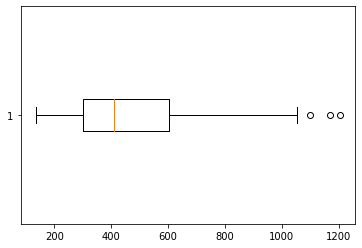

In [ ]:
plt.boxplot(valores_sin_outliers['Millas'], vert=False)
plt.show()